In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [101]:
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving winequality-red.csv to winequality-red (2).csv


In [0]:
df_wine = pd.read_csv('winequality-red.csv', sep = ';')

In [103]:
# verificando as infos do dataframe
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [104]:
# dados estatisticos do dataframe
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [105]:
# verificando valoes nulos
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [106]:
# avaliando a variavel residual sugar
df_wine['residual sugar'].unique()

array([ 1.9 ,  2.6 ,  2.3 ,  1.8 ,  1.6 ,  1.2 ,  2.  ,  6.1 ,  3.8 ,
        3.9 ,  1.7 ,  4.4 ,  2.4 ,  1.4 ,  2.5 , 10.7 ,  5.5 ,  2.1 ,
        1.5 ,  5.9 ,  2.8 ,  2.2 ,  3.  ,  3.4 ,  5.1 ,  4.65,  1.3 ,
        7.3 ,  7.2 ,  2.9 ,  2.7 ,  5.6 ,  3.1 ,  3.2 ,  3.3 ,  3.6 ,
        4.  ,  7.  ,  6.4 ,  3.5 , 11.  ,  3.65,  4.5 ,  4.8 ,  2.95,
        5.8 ,  6.2 ,  4.2 ,  7.9 ,  3.7 ,  6.7 ,  6.6 ,  2.15,  5.2 ,
        2.55, 15.5 ,  4.1 ,  8.3 ,  6.55,  4.6 ,  4.3 ,  5.15,  6.3 ,
        6.  ,  8.6 ,  7.5 ,  2.25,  4.25,  2.85,  3.45,  2.35,  2.65,
        9.  ,  8.8 ,  5.  ,  1.65,  2.05,  0.9 ,  8.9 ,  8.1 ,  4.7 ,
        1.75,  7.8 , 12.9 , 13.4 ,  5.4 , 15.4 ,  3.75, 13.8 ,  5.7 ,
       13.9 ])

In [107]:
# mediana da variavel residual sugar
df_wine['residual sugar'].median()

2.2

In [108]:
# desvio padrão da variavel fixed acidity
df_wine['fixed acidity'].std()

1.7410963181277006

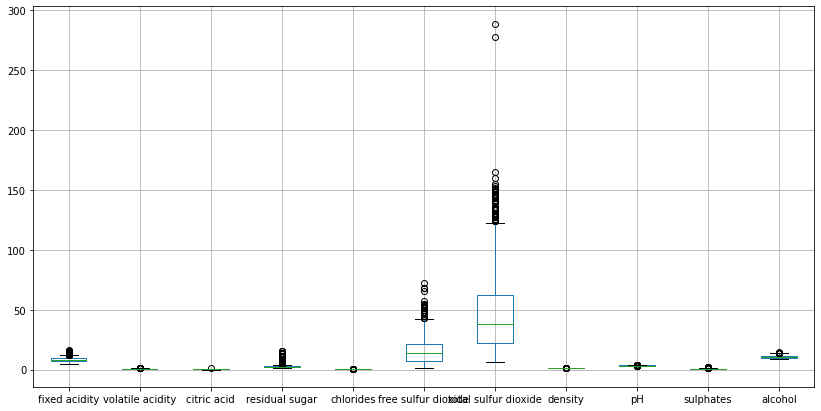

In [109]:
# verificando outliers
plt.figure(figsize = (14,7))
df_wine[['fixed acidity','volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].boxplot()
plt.show()

               fixed acidity        pH
fixed acidity       1.000000 -0.682978
pH                 -0.682978  1.000000


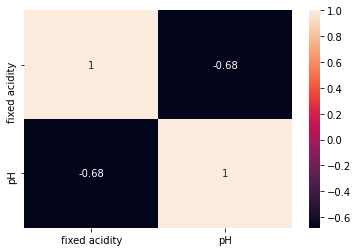

In [110]:
# matriz de correlação entre "fixed acidity" e "pH" 
print(df_wine[["fixed acidity", "pH"]].corr())

# plot da matrix de correlação
corr = df_wine[["fixed acidity", "pH"]].corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True) 
plt.show()

          quality   alcohol
quality  1.000000  0.476166
alcohol  0.476166  1.000000


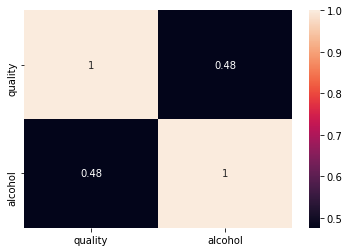

In [111]:
# matriz de correlação entre  "quality" e "alcohol"
print(df_wine[["quality", "alcohol"]].corr())

# plot da matrix de correlação
corr = df_wine[["quality", "alcohol"]].corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True) 
plt.show()

In [112]:
# quantidade de instancias para o target quality
df_wine[df_wine['quality'] == 5].count()

fixed acidity           681
volatile acidity        681
citric acid             681
residual sugar          681
chlorides               681
free sulfur dioxide     681
total sulfur dioxide    681
density                 681
pH                      681
sulphates               681
alcohol                 681
quality                 681
dtype: int64

In [0]:
# aplicando a normalização para dados de entrada
df_dados = df_wine[['fixed acidity','volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].values
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(df_dados)
df_dados = pd.DataFrame(x_scaled)
df_dados.columns  = ['fixed acidity','volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [114]:
# verificando o menor valor normalizado para fixed acidity
df_dados.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.490211,0.449695,0.196496,0.311228
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138571,0.121564,0.101501,0.163949
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.448819,0.173653,0.276923
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.519685,0.239521,0.415385
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [115]:
# criando os df de entrada e saida
df_entrada = df_dados
df_saida = df_wine['quality']
print('Entradas:', df_entrada.shape)
print('Saida:', df_saida.shape)

Entradas: (1599, 11)
Saida: (1599,)


In [116]:
# dividindo os dados para treinamento e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(df_entrada, df_saida, test_size = 0.30, random_state = 1)
print('x_treino: ', x_treino.shape)
print('x_teste: ', x_teste.shape)
print('y_treino: ', y_treino.shape)
print('y_teste: ', y_teste.shape)

x_treino:  (1119, 11)
x_teste:  (480, 11)
y_treino:  (1119,)
y_teste:  (480,)


## Aplicando o modelo KNN


In [117]:
# aplicando o modelo KNN
clf_KNN = KNeighborsClassifier(n_neighbors = 5) # utiliza a construção por meio de 5 vizinhos
clf_KNN.fit(x_treino, y_treino) # aplica a classificação

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
# realizando a previsão
y_pred = clf_KNN.predict(x_teste)

In [119]:
# verificando a acuracia do modelo
print(accuracy_score(y_teste, y_pred))

0.5645833333333333


## Aplicando o modelo Arvore de Descisão

In [120]:
# aplicando o modelo
clf_arvore = DecisionTreeClassifier()
clf_arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
# realizando a previsão
y_pred = clf_arvore.predict(x_teste)

In [122]:
# verificando a acuracia do modelo
print(accuracy_score(y_teste, y_pred))

0.5854166666666667


## Aplicando o modelo Randon Forest

      

In [123]:
# aplicando o modelo
clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)
clf_floresta.fit(x_treino, y_treino)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [0]:
# realizando a previsão
y_pred = clf_floresta.predict(x_teste)

In [125]:
# verificando a acuracia do modelo
print(accuracy_score(y_teste, y_pred))

0.6791666666666667


## Aplicando o modelo SVM

In [126]:
# aplicando o modelo
clf_svm = SVC(gamma='auto',kernel='rbf')
clf_svm.fit(x_treino, y_treino)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
# realizando a previsão
y_pred = clf_svm.predict(x_teste)

In [128]:
# verificando a acuracia do modelo
print(accuracy_score(y_teste, y_pred))

0.5854166666666667


## Aplicando o modelo Rede MLP

In [129]:
# aplicando o modelo
clf_mlp = MLPClassifier( alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)
clf_mlp.fit(x_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [0]:
# realizando a previsão
y_pred = clf_mlp.predict(x_teste)

In [131]:
# verificando a acuracia do modelo
print(accuracy_score(y_teste, y_pred))

0.6


In [134]:
# ajustando o valor de saida para deixar como binario
df_saida[df_saida <= 5] = 0
df_saida[df_saida > 5] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [135]:
df_saida.unique()

array([0, 1])

## Aplicando o modelo Randon Forest com a conversão do dados de saida para Binario

In [136]:
# dividindo os dados para treinamento e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(df_entrada, df_saida, test_size = 0.30, random_state = 1)
print('x_treino: ', x_treino.shape)
print('x_teste: ', x_teste.shape)
print('y_treino: ', y_treino.shape)
print('y_teste: ', y_teste.shape)

x_treino:  (1119, 11)
x_teste:  (480, 11)
y_treino:  (1119,)
y_teste:  (480,)


In [137]:
# aplicando o modelo Randon FOrest
clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)
clf_floresta.fit(x_treino, y_treino)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [0]:
# realizando a previsão
y_pred = clf_floresta.predict(x_teste)

In [139]:
# verificando a acuracia do modelo
print(accuracy_score(y_teste, y_pred))

0.8041666666666667
